<a href="https://colab.research.google.com/github/Data1708/testrepo/blob/main/assignment2__Jinghua_Guo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Continuous Visualization

Imagine you're a data scientist working for the University of Michigan teaching and learning team, and one of your job responsibilities is to offer instructional advice based on course performance metrics. As part of this activity you might be asked to analyze student's grade distribution in a range of undergraduate and graduate level courses to draw comparisons between courses and come up with insights regarding how to enhance residential education across different subjects.

## Question 1 Draw probability density plot (30%)

Your first task is to compare 5 different distributions in three different ways.  The five distributions are as follows:

* a $t$-distribution with 9, 99, 999, and 9999 degrees of freedom with mean 0 and standard deviation 2.

* a normal distribution with mean 0 and standard deviation 2.  

First compare the five distributions using a **probability density plot** within a single figure so that each of the curves is in a different color and line type. 

Next compare the five distributions using a **violin plot** within a single figure so that each of the curves is in a different color. 

Next compare the five distributions using a **box and wiskers** within a single figure so that each of the distributions is in a different color. 

If you need points for your a paticular plot type, take a sample of 500 points.  

Please make a well-designed and well-annotated plots (e.g. visually appealing, titles, labels, etc).  

Hint: You can use the method ".ppf($\cdot$)" to get the density at a point of a scipy distribution.   You might want to use scipy.stats.t, scipy.stats.norm, scipy.stats.norm.rvs, and/or stats.t.rvs.   


In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

In [ ]:
mu=0
sigma=2
degree=[9,99,999,9999]
degree_sample=[10,100,1000,10000]
def make_t_distribution(sample_size, mean, sd):
    t_sample = stats.t.rvs(sample_size - 1, mean, sd, sample_size) # Random t-distribution sample
    sample_mean = np.mean(t_sample) # sample mean
    sample_std = np.std(t_sample) # sample standard deviation
    t_dist = stats.t(df = sample_size-1, loc = sample_mean, scale = sample_std) # make a t-distribution based on the sample
    x_axis = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999),500) # Generate an x-axis based on t-quantile values
    return t_dist, x_axis

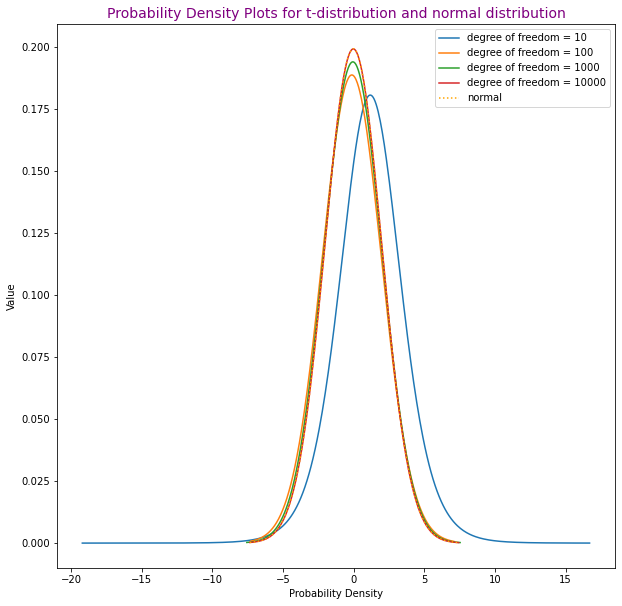

In [ ]:
#Probability Density Plot
#test code with adjusted function
mu=0
sigma=2
degree=[9,99,999,9999]
degree_sample=[10,100,1000,10000]
## plot probability density plot
#plot t distribution
line_type=['r-','b--','g:','c-.']
plt.figure(figsize=(10,10))
for dg,ls in zip(degree_sample,line_type):
    rv=make_t_distribution(dg,mu,sigma)[0]
    x =make_t_distribution(dg,mu,sigma)[1]
    y =rv.pdf(x)
    string=str(dg)
    plt.plot(x,y,label='degree of freedom = '+string)
#plot normal distribution
rv1=stats.norm(mu,sigma)
x1 = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 500)
y1 = rv.pdf(x)
plt.plot(x,y,label='normal',color='orange', linestyle=':')
plt.xlabel('Probability Density')
plt.ylabel('Value')
plt.title('Probability Density Plots for t-distribution and normal distribution',color='purple',fontsize=14)
plt.legend()  

Text(0.5, 1.0, 'Violin plots for t-distribution and normal distribution')

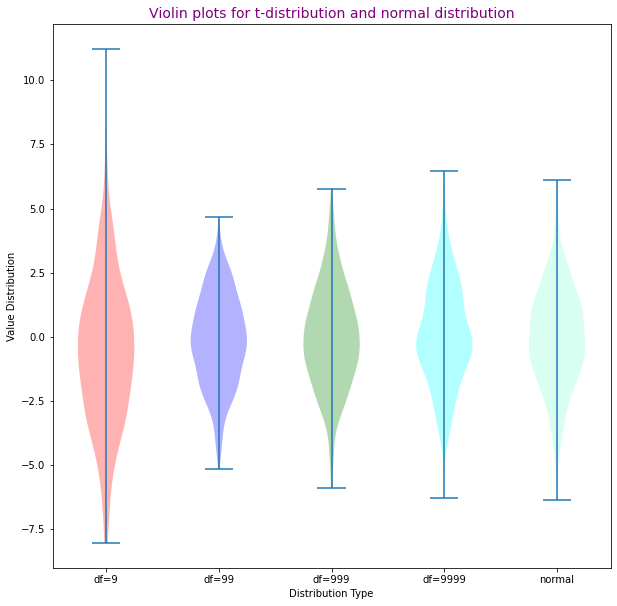

In [ ]:
#plot violin plots for t-distributions
colors=['red','blue','green','cyan','aquamarine']
labels=['df=9','df=99','df=999','df=9999','normal']
plt.figure(figsize=(10,10))
distributions=[]
for dg,c in zip(degree_sample,colors):
    rv=make_t_distribution(dg,mu,sigma)[0]
    x=rv.rvs(500)
    distributions.append(x)
#plot violin plot for normal distributions
rv1=stats.norm(mu,sigma)
x1=rv1.rvs(500)
distributions.append(x1)
violins=plt.violinplot(distributions)
for color,face in zip(colors,violins['bodies']):
    face.set_facecolor(color)
plt.xticks(ticks=[1,2,3,4,5],labels=labels)
plt.xlabel('Distribution Type')
plt.ylabel('Value Distribution')
plt.title('Violin plots for t-distribution and normal distribution',color='purple',fontsize=14)

Text(0.5, 1.0, 'Box plots for t-distribution and normal distribution')

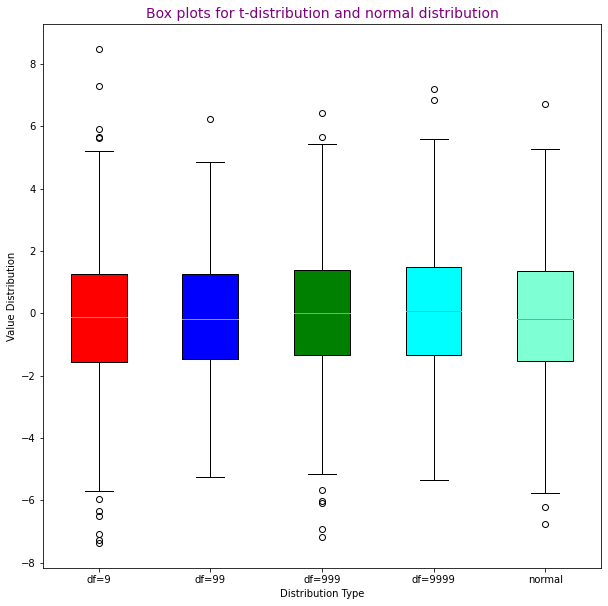

In [ ]:
#plot boxplots for t-distributions
colors=['red','blue','green','cyan','aquamarine']
labels=('df=9','df=99','df=999','df=9999','normal')
plt.figure(figsize=(10,10))
distributions=[]
for dg,c in zip(degree_sample,colors):
    rv=make_t_distribution(dg,mu,sigma)[0]
    x=rv.rvs(500)
    distributions.append(x)
#plot violin plot for normal distributions
rv1=stats.norm(mu,sigma)
x1=rv1.rvs(500)
distributions.append(x1)
boxes=plt.boxplot(distributions,patch_artist=True)
for patch,color in zip(boxes['boxes'],colors):
    patch.set_facecolor(color)
plt.xticks(ticks=[1,2,3,4,5],labels=labels)
plt.xlabel('Distribution Type')
plt.ylabel('Value Distribution')
plt.title('Box plots for t-distribution and normal distribution',color='purple',fontsize=14)


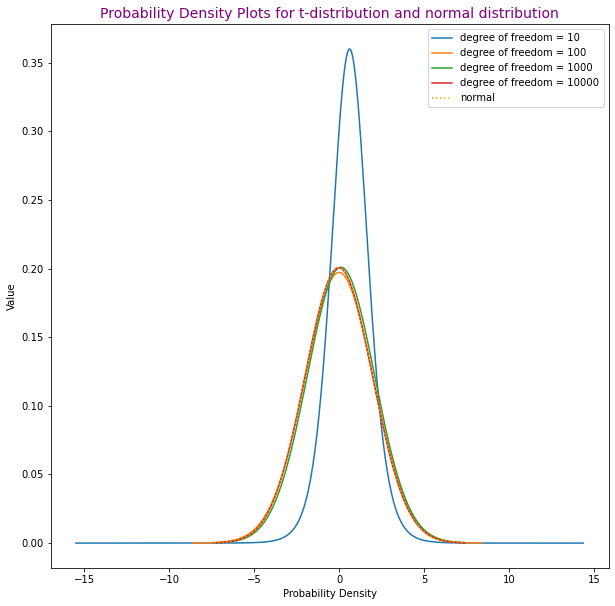

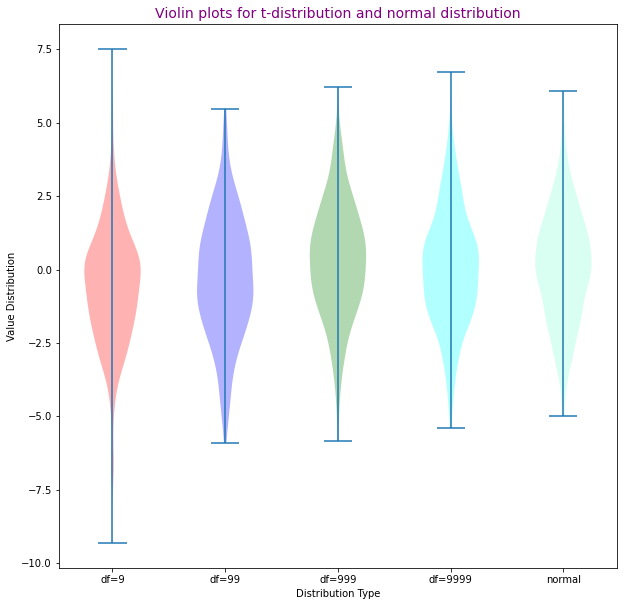

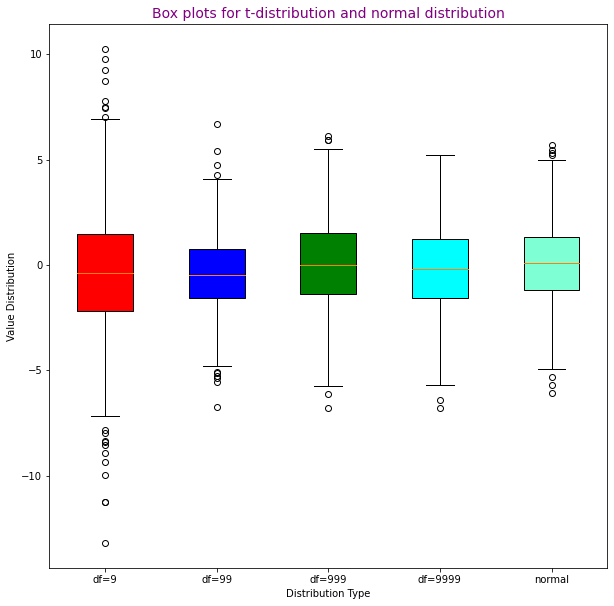

In [ ]:
#original cell
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def make_t_distribution(sample_size, mean, sd):
    t_sample = stats.t.rvs(sample_size - 1, mean, sd, sample_size) # Random t-distribution sample
    sample_mean = np.mean(t_sample) # sample mean
    sample_std = np.std(t_sample) # sample standard deviation
    t_dist = stats.t(df = sample_size - 1, loc = sample_mean, scale = sample_std) # make a t-distribution based on the sample
    x_axis = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 500) # Generate an x-axis based on t-quantile values
    return t_dist, x_axis

def make_prob_plot():
    mu=0
    sigma=2
    degree=[9,99,999,9999]
    degree_sample=[10,100,1000,10000]
    
    ## plot probability density plot
    #plot t distribution
    line_type=['r-','b--','g:','c-.']
    plt.figure(figsize=(10,10))
    for dg,ls in zip(degree_sample,line_type):
        rv=make_t_distribution(dg,mu,sigma)[0]
        x =make_t_distribution(dg,mu,sigma)[1]
        y =rv.pdf(x)
        string=str(dg)
        plt.plot(x,y,label='degree of freedom = '+string)
    #plot normal distribution
    rv1=stats.norm(mu,sigma)
    x1 = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 500)
    y1 = rv.pdf(x)
    plt.plot(x,y,label='normal',color='orange', linestyle=':')
    plt.xlabel('Probability Density')
    plt.ylabel('Value')
    plt.title('Probability Density Plots for t-distribution and normal distribution',color='purple',fontsize=14)
    plt.legend()  
    plt.show()
    
    #plot violin plots for t-distributions
    colors=['red','blue','green','cyan','aquamarine']
    labels=['df=9','df=99','df=999','df=9999','normal']
    plt.figure(figsize=(10,10))
    distributions=[]
    for dg,c in zip(degree_sample,colors):
        rv=make_t_distribution(dg,mu,sigma)[0]
        x=rv.rvs(500)
        distributions.append(x)
    #plot violin plot for normal distributions
    rv1=stats.norm(mu,sigma)
    x1=rv1.rvs(500)
    distributions.append(x1)
    violins=plt.violinplot(distributions)
    for color,face in zip(colors,violins['bodies']):
        face.set_facecolor(color)
    plt.xticks(ticks=[1,2,3,4,5],labels=labels)
    plt.xlabel('Distribution Type')
    plt.ylabel('Value Distribution')
    plt.title('Violin plots for t-distribution and normal distribution',color='purple',fontsize=14)
    plt.show()
    
    #plot boxplots for t-distributions
    colors=['red','blue','green','cyan','aquamarine']
    labels=('df=9','df=99','df=999','df=9999','normal')
    plt.figure(figsize=(10,10))
    distributions=[]
    for dg,c in zip(degree_sample,colors):
        rv=make_t_distribution(dg,mu,sigma)[0]
        x=rv.rvs(500)
        distributions.append(x)
    #plot violin plot for normal distributions
    rv1=stats.norm(mu,sigma)
    x1=rv1.rvs(500)
    distributions.append(x1)
    boxes=plt.boxplot(distributions,patch_artist=True)
    for patch,color in zip(boxes['boxes'],colors):
        patch.set_facecolor(color)
    plt.xticks(ticks=[1,2,3,4,5],labels=labels)
    plt.xlabel('Distribution Type')
    plt.ylabel('Value Distribution')
    plt.title('Box plots for t-distribution and normal distribution',color='purple',fontsize=14)
    plt.show()

make_prob_plot()

## Question 2 Grade Distribution Comparison (40%)

Now you have impressed the management team, you have been given a sample data file `assets/class_grades.csv` for a number of courses, and you have been asked to consider the letter grades for STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, EECS 545 for the past records since 2015. The student grades are stored in 6 columns: 
* `STATS250_grade` stores the letter grades for those who took the STATS 250 course
* `DATASCI306_grade` stores the letter grades for those who took the DATASCI 306 course
* `MATH217_grade` stores the letter grades for those who took the MATH 217 course
* `ENGLISH125_grade` stores the letter grades for those who took the ENGLISH 125 course
* `ECON101_grade` stores the letter grades for those who took the ECON 101 course
* `EECS545_grade` stores the letter grades for those who took the EECS 545 course

Prior to drawing plots for student grade distribution, it's useful to compute the total student enrollments for each course (of course, you need to ignore NAN values) and convert student's letter grades into standard grade points. Here's a nice table on the grade point systems available at the umich website:

| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

You are asked to:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively
* Remove the gaps between the bars in the histograms if any
* For each probability plot, you should overlay a normal distribution with the same mean and standard deviation parameters as you see in the samples (you can calculate this!)
* You should of course use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis

Hints:
* To make subplots, one good way to start with is to use `fig, ax = plt.subplot()`
* To remove the gaps that might show up in histograms, you can customize the `bins` parameter
* If you want to make histograms using the distplot function in seaborn package, you need to specify the parameters `kde = False` and `norm_hist = True`

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('assets/class_grades.csv')
df.shape

(21387, 7)

In [ ]:
df.columns

Index(['Unnamed: 0', 'ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade',
       'MATH217_grade', 'STATS250_grade', 'EECS545_grade'],
      dtype='object')

In [ ]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [ ]:
#drop irrelevant colums
df=df.iloc[:,1:7]
df.columns
courses=['ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade','MATH217_grade', 'STATS250_grade', 'EECS545_grade']
#drop NaN and standardise text of letter grades for each course
subjects=[]
for course in courses:
    subdna=df[course].dropna().apply(lambda x:str(x).strip())
    subjects.append(subdna)
#map letter grade to numerical scale to faciliate histogram plot
dictgrade={'A+':12.0,'A':11.0,'A-':10.0,'B+':9.0,'B':8.0,'B-':7.0,'C+':6.0,'C':5.0,'C-':4.0,'D+':3.0,'D':2.0,'D-':1.0,'E':0.0}
subjects_clean=[]
for sub in subjects:
    subject=sub.map(dictgrade)
    subjects_clean.append(subject)
#check enrollment
enroll=[]
for attend in subjects_clean:
    enroll.append(len(attend))

In [ ]:
np.arange(0,len(subjects_clean))

array([0, 1, 2, 3, 4, 5])

In [ ]:
#check for distribution of grade points for each course
for i in range(0,len(subjects_clean)):
    z=subjects_clean[i]
    k=pd.DataFrame(z).value_counts()
    print(k.sort_index())

ECON101_grade
0.0               141
1.0                36
2.0               142
3.0               106
4.0               426
5.0               709
6.0               993
7.0              1277
8.0              2270
9.0              1987
10.0             2553
11.0             2554
12.0              993
dtype: int64
ENGLISH125_grade
0.0                   35
2.0                   35
3.0                   36
4.0                   35
5.0                  142
6.0                  142
7.0                  213
8.0                  923
9.0                 1775
10.0                3478
11.0                6673
12.0                 709
dtype: int64
DATASCI306_grade
0.0                   3
1.0                   8
2.0                   8
3.0                  16
4.0                  24
5.0                  39
6.0                  46
7.0                  69
8.0                  80
9.0                 110
10.0                183
11.0                150
12.0                 55
dtype: int64
MATH217_grade
0

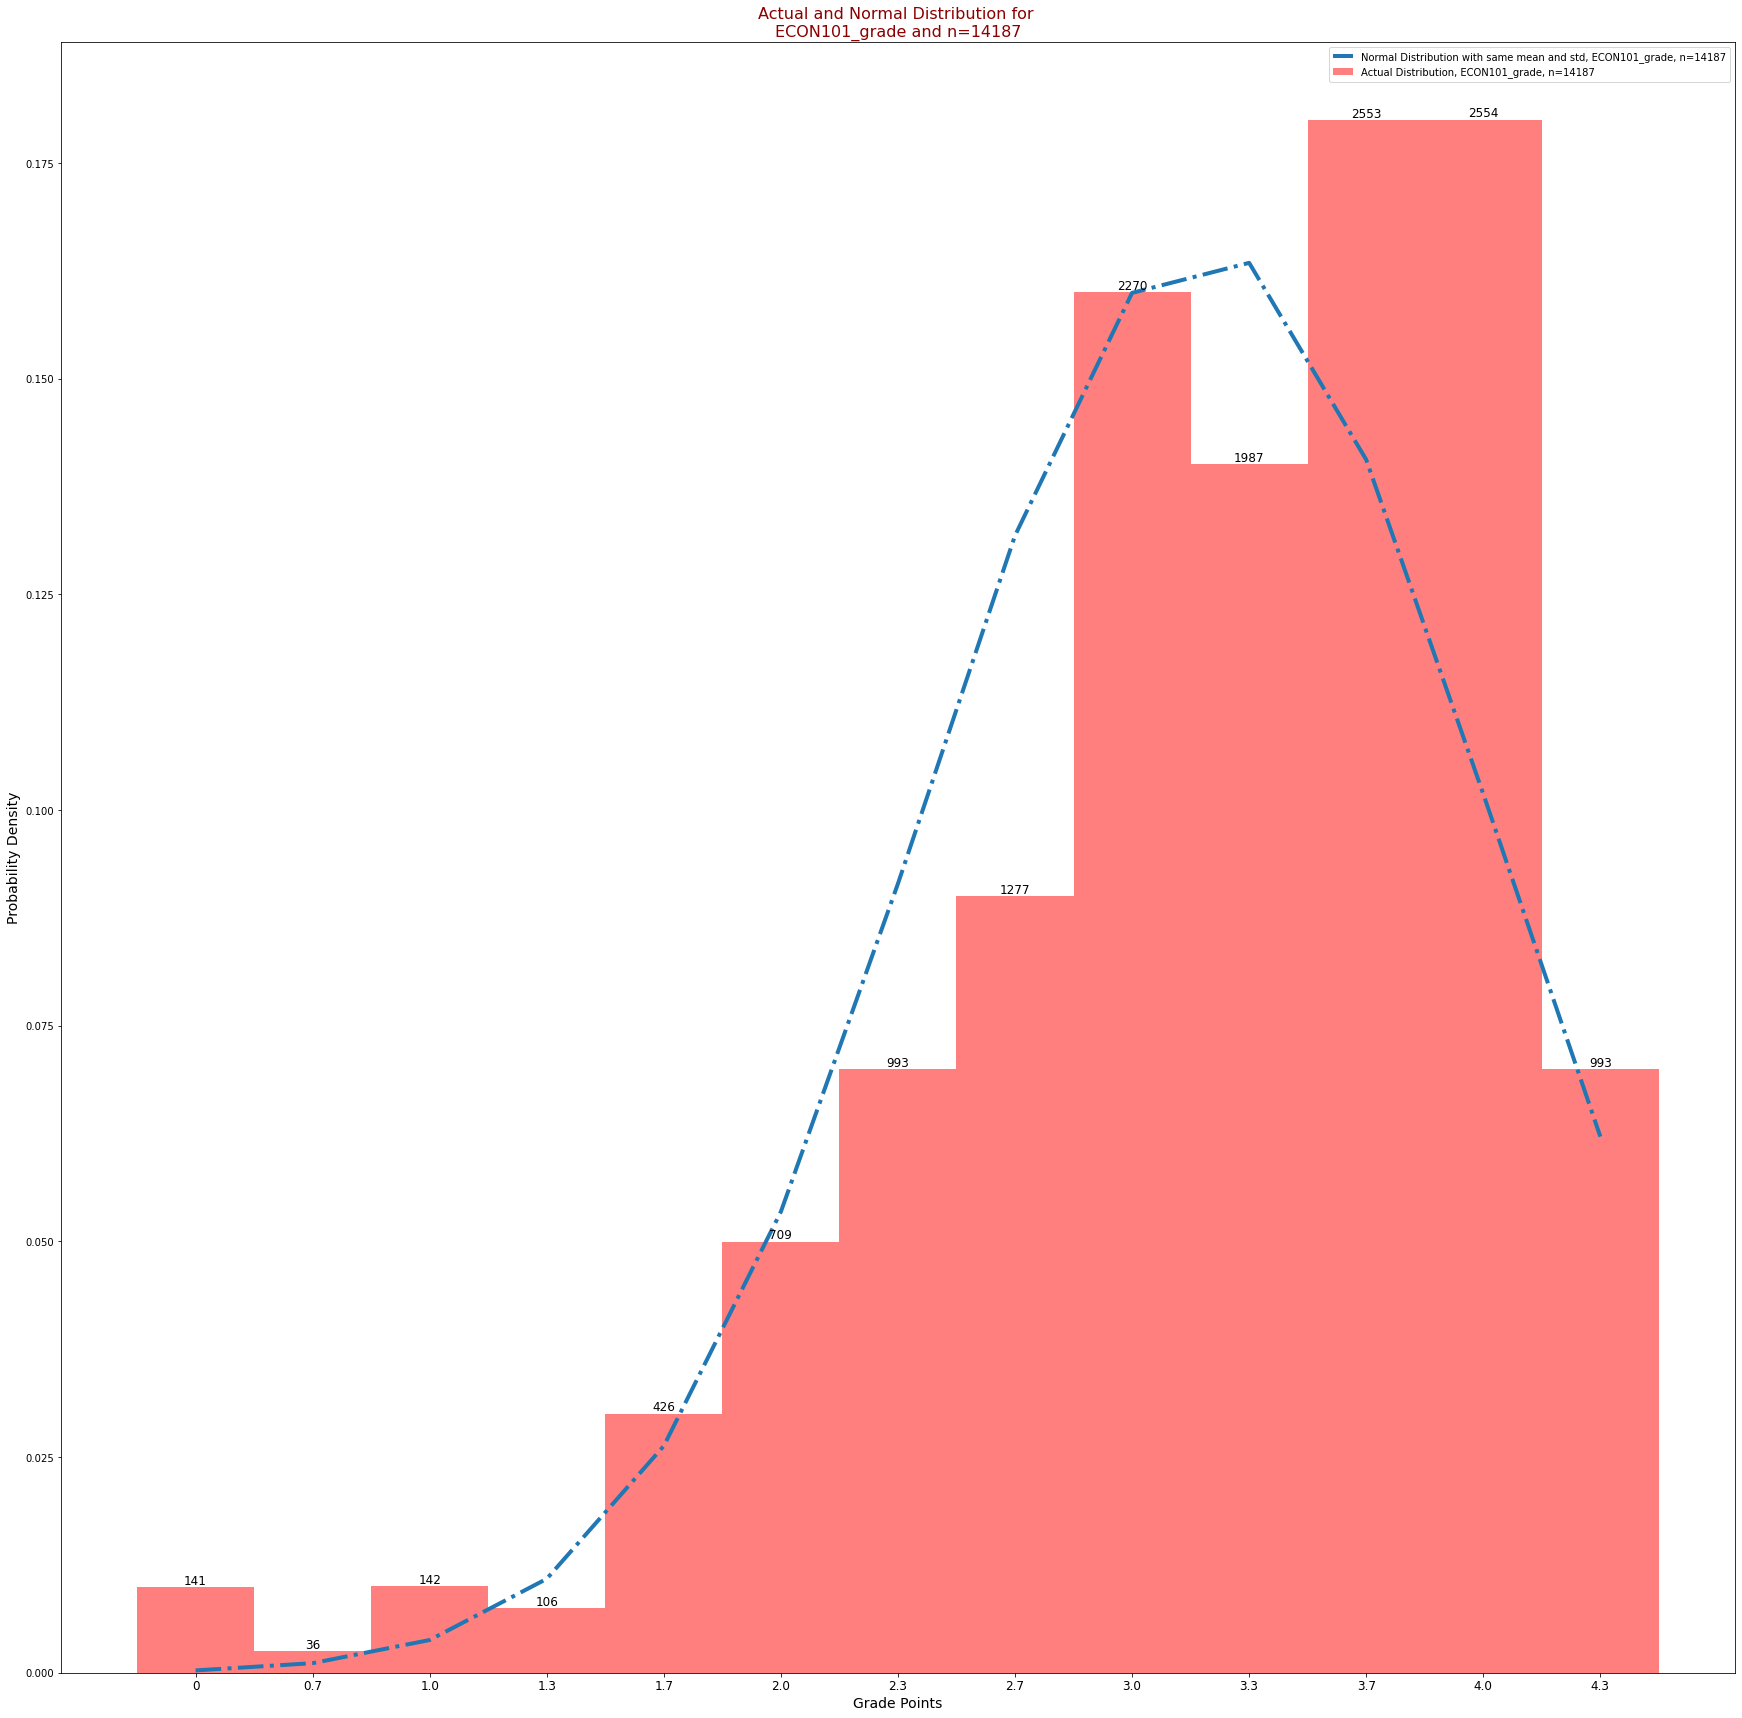

In [ ]:
#test code
courses=['ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade','MATH217_grade', 'STATS250_grade', 'EECS545_grade']
grade1=[0, 0.7, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.3]
grades=[]
for i in grade1:
    grade=str(i)
    grades.append(grade)
ticks=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0]

fig, axs = plt.subplots(1,1,figsize=(30, 30))
ax1=plt.subplot(111)

#ECON101
z=subjects_clean[0]
z1=sorted(z)
fit = stats.norm.pdf(z1, np.mean(z1), np.std(z1))
text='Normal Distribution with same mean and std, {}, n={}'.format(courses[0],len(z))
ax1.plot(z1,fit,label=text,linestyle='-.',linewidth=4)
text='Actual Distribution, {}, n={}'.format(courses[0],len(z))
bars=ax1.hist(z,color='red',density=True,bins=np.arange(14)-0.5,alpha=0.5,label=text)
ax1.set_xticks(ticks)
ax1.set_xticklabels(grades,fontsize=12)
ax1.set_ylabel('Probability Density',fontsize=14)
ax1.set_xlabel('Grade Points',fontsize=14)
axe=plt.gca()
bars=ax1.patches
k=pd.DataFrame(z.value_counts())
k=k.sort_index(ascending=True)
for bar in bars: 
    height = bar.get_height()
    label=int(height*len(z))
    ax1.text(bar.get_x() + bar.get_width() / 2, height, label,ha='center', va='bottom',fontsize=12) 
text='Actual and Normal Distribution for \n{} and n={}'.format(courses[0],len(z))
ax1.set_title(text,fontsize=16,color='darkred')
ax1.legend() 

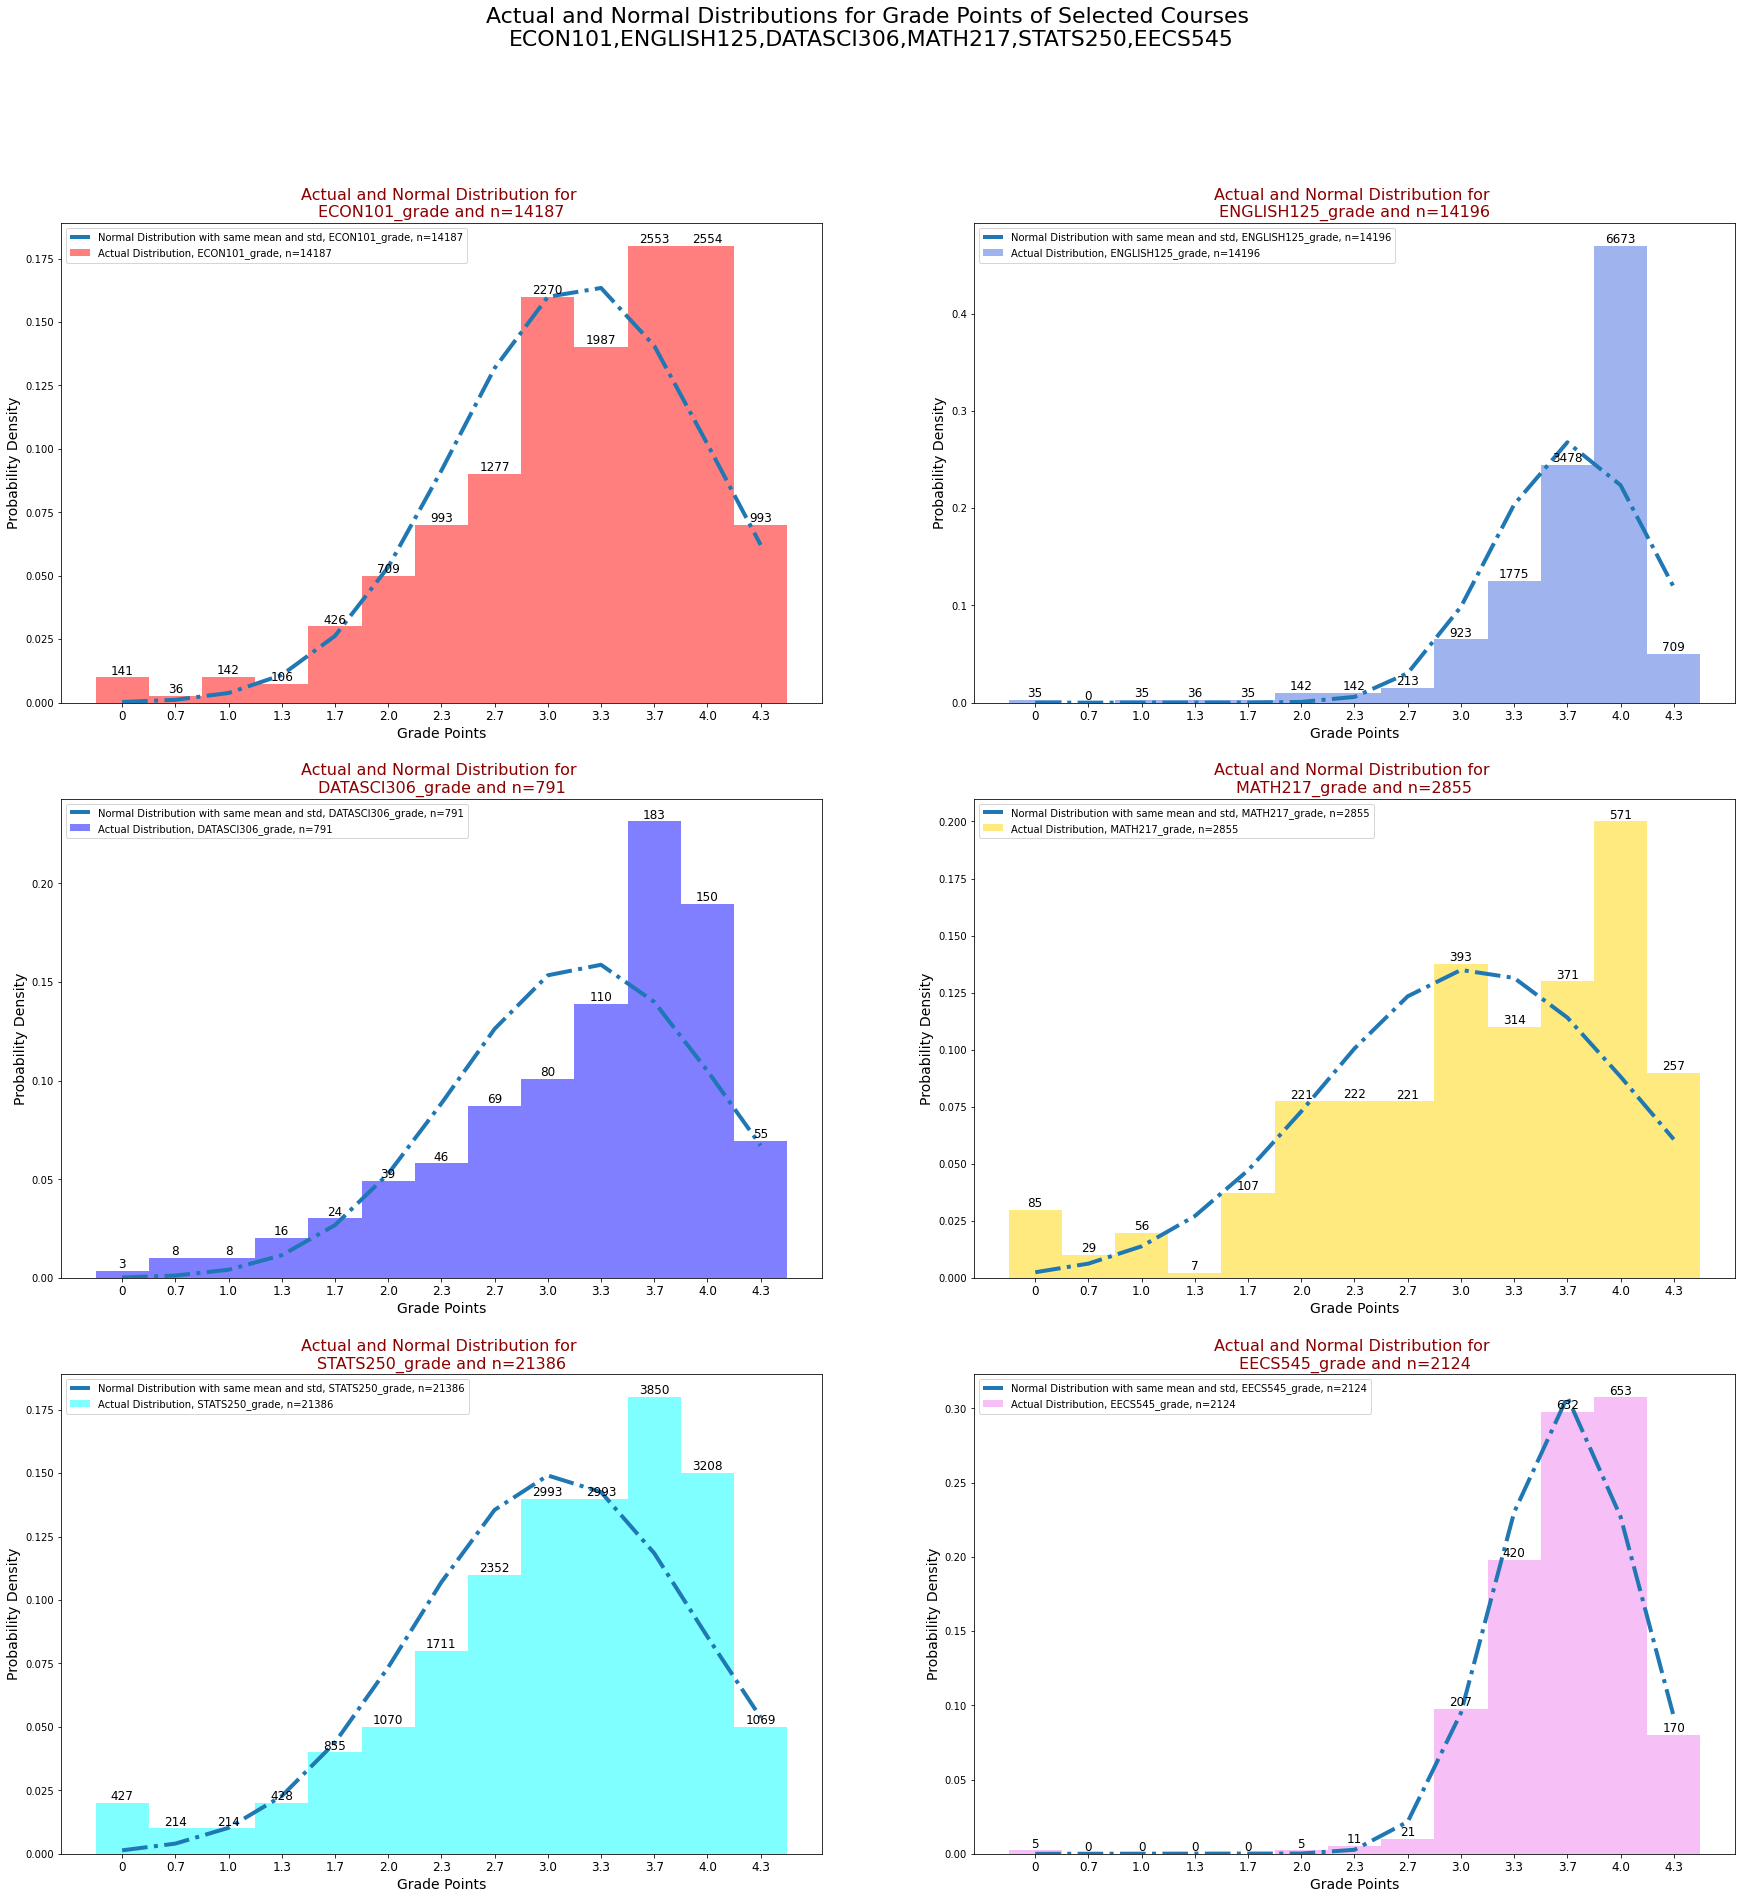

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def grade_distribution():

    df=pd.read_csv('assets/class_grades.csv')
    #drop irrelevant colums
    df=df.iloc[:,1:7]
    df.columns
    courses=['ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade','MATH217_grade', 'STATS250_grade', 'EECS545_grade']
    #drop NaN and standardise text of letter grades for each course
    subjects=[]
    for course in courses:
        subdna=df[course].dropna().apply(lambda x:str(x).strip())
        subjects.append(subdna)
    #map letter grade to numerical scale to faciliate histogram plot
    dictgrade={'A+':12.0,'A':11.0,'A-':10.0,'B+':9.0,'B':8.0,'B-':7.0,'C+':6.0,'C':5.0,'C-':4.0,'D+':3.0,'D':2.0,'D-':1.0,'E':0.0}
    subjects_clean=[]
    for sub in subjects:
        subject=sub.map(dictgrade)
        subjects_clean.append(subject)
    #check enrollment
    enroll=[]
    for attend in subjects_clean:
        enroll.append(len(attend))

    courses=['ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade','MATH217_grade', 'STATS250_grade', 'EECS545_grade']
    grade1=[0, 0.7, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.3]
    #prepare list of letter grades for subsequent coversion in histogram xtick labels
    grades=[]
    for i in grade1:
        grade=str(i)
        grades.append(grade)
    ticks=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0]
        
    fig, axs = plt.subplots(3,2,figsize=(30, 30))
    ax1=plt.subplot(321)
    ax2=plt.subplot(322)
    ax3=plt.subplot(323)
    ax4=plt.subplot(324)
    ax5=plt.subplot(325)
    ax6=plt.subplot(326)

    #ECON101
    z=subjects_clean[0]
    z1=sorted(z)
    fit = stats.norm.pdf(z1, np.mean(z1), np.std(z1))
    text='Normal Distribution with same mean and std, {}, n={}'.format(courses[0],len(z))
    ax1.plot(z1,fit,label=text,linestyle='-.',linewidth=4)
    text='Actual Distribution, {}, n={}'.format(courses[0],len(z))
    bars=ax1.hist(z,color='red',density=True,bins=np.arange(14)-0.5,alpha=0.5,label=text)
    ax1.set_xticks(ticks)
    ax1.set_xticklabels(grades,fontsize=12)
    ax1.set_ylabel('Probability Density',fontsize=14)
    ax1.set_xlabel('Grade Points',fontsize=14)

    bars=ax1.patches
    k=pd.DataFrame(z.value_counts())
    k=k.sort_index(ascending=True)
    for bar in bars: 
        height = bar.get_height()
        label=int(height*len(z))
        ax1.text(bar.get_x() + bar.get_width() / 2, height, label,ha='center', va='bottom',fontsize=12) 
    text='Actual and Normal Distribution for \n{} and n={}'.format(courses[0],len(z))
    ax1.set_title(text,fontsize=16,color='darkred')
    ax1.legend() 

    #ENGLISH125
    z=subjects_clean[1]
    z1=sorted(z)
    fit = stats.norm.pdf(z1, np.mean(z1), np.std(z1))
    text='Normal Distribution with same mean and std, {}, n={}'.format(courses[1],len(z))
    ax2.plot(z1,fit,label=text,linestyle='-.',linewidth=4)
    text='Actual Distribution, {}, n={}'.format(courses[1],len(z))
    bars=ax2.hist(z,color='royalblue',density=True,bins=np.arange(14)-0.5,alpha=0.5,label=text)
    ax2.set_xticks(ticks)
    ax2.set_xticklabels(grades,fontsize=12)
    ax2.set_ylabel('Probability Density',fontsize=14)
    ax2.set_xlabel('Grade Points',fontsize=14)

    bars=ax2.patches
    k=pd.DataFrame(z.value_counts())
    k=k.sort_index(ascending=True)
    for bar in bars: 
        height = bar.get_height()
        label=int(height*len(z))
        ax2.text(bar.get_x() + bar.get_width() / 2, height, label,ha='center', va='bottom',fontsize=12) 
    text='Actual and Normal Distribution for \n{} and n={}'.format(courses[1],len(z))
    ax2.set_title(text,fontsize=16,color='darkred')
    ax2.legend() 
    
    #DATASCI306
    z=subjects_clean[2]
    z1=sorted(z)
    fit = stats.norm.pdf(z1, np.mean(z1), np.std(z1))
    text='Normal Distribution with same mean and std, {}, n={}'.format(courses[2],len(z))
    ax3.plot(z1,fit,label=text,linestyle='-.',linewidth=4)
    text='Actual Distribution, {}, n={}'.format(courses[2],len(z))
    bars=ax3.hist(z,color='blue',density=True,bins=np.arange(14)-0.5,alpha=0.5,label=text)
    ax3.set_xticks(ticks)
    ax3.set_xticklabels(grades,fontsize=12)
    ax3.set_ylabel('Probability Density',fontsize=14)
    ax3.set_xlabel('Grade Points',fontsize=14)
    axe=plt.gca()
    bars=ax3.patches
    k=pd.DataFrame(z.value_counts())
    k=k.sort_index(ascending=True)
    for bar in bars: 
        height = bar.get_height()
        label=int(height*len(z))
        ax3.text(bar.get_x() + bar.get_width() / 2, height, label,ha='center', va='bottom',fontsize=12) 
    text='Actual and Normal Distribution for \n{} and n={}'.format(courses[2],len(z))
    ax3.set_title(text,fontsize=16,color='darkred')
    ax3.legend() 

    #MATH217
    z=subjects_clean[3]
    z1=sorted(z)
    fit = stats.norm.pdf(z1, np.mean(z1), np.std(z1))
    text='Normal Distribution with same mean and std, {}, n={}'.format(courses[3],len(z))
    ax4.plot(z1,fit,label=text,linestyle='-.',linewidth=4)
    text='Actual Distribution, {}, n={}'.format(courses[3],len(z))
    bars=ax4.hist(z,color='gold',density=True,bins=np.arange(14)-0.5,alpha=0.5,label=text)
    ax4.set_xticks(ticks)
    ax4.set_xticklabels(grades,fontsize=12)
    ax4.set_ylabel('Probability Density',fontsize=14)
    ax4.set_xlabel('Grade Points',fontsize=14)
    bars=ax4.patches
    k=pd.DataFrame(z.value_counts())
    k=k.sort_index(ascending=True)
    for bar in bars: 
        height = bar.get_height()
        label=int(height*len(z))
        ax4.text(bar.get_x() + bar.get_width() / 2, height, label,ha='center', va='bottom',fontsize=12) 
    text='Actual and Normal Distribution for \n{} and n={}'.format(courses[3],len(z))
    ax4.set_title(text,fontsize=16,color='darkred')
    ax4.legend() 

    #STATS250
    z=subjects_clean[4]
    z1=sorted(z)
    fit = stats.norm.pdf(z1, np.mean(z1), np.std(z1))
    text='Normal Distribution with same mean and std, {}, n={}'.format(courses[4],len(z))
    ax5.plot(z1,fit,label=text,linestyle='-.',linewidth=4)
    text='Actual Distribution, {}, n={}'.format(courses[4],len(z))
    bars=ax5.hist(z,color='cyan',density=True,bins=np.arange(14)-0.5,alpha=0.5,label=text)
    ax5.set_xticks(ticks)
    ax5.set_xticklabels(grades,fontsize=12)
    ax5.set_ylabel('Probability Density',fontsize=14)
    ax5.set_xlabel('Grade Points',fontsize=14)
    bars=ax5.patches
    k=pd.DataFrame(z.value_counts())
    k=k.sort_index(ascending=True)
    for bar in bars: 
        height = bar.get_height()
        label=int(height*len(z))
        ax5.text(bar.get_x() + bar.get_width() / 2, height, label,ha='center', va='bottom',fontsize=12) 
    text='Actual and Normal Distribution for \n{} and n={}'.format(courses[4],len(z))
    ax5.set_title(text,fontsize=16,color='darkred')
    ax5.legend() 

    #EECS545
    z=subjects_clean[5]
    z1=sorted(z)
    fit = stats.norm.pdf(z1, np.mean(z1), np.std(z1))
    text='Normal Distribution with same mean and std, {}, n={}'.format(courses[5],len(z))
    ax6.plot(z1,fit,label=text,linestyle='-.',linewidth=4)
    text='Actual Distribution, {}, n={}'.format(courses[5],len(z))
    bars=ax6.hist(z,color='violet',density=True,bins=np.arange(14)-0.5,alpha=0.5,label=text)
    ax6.set_xticks(ticks)
    ax6.set_xticklabels(grades,fontsize=12)
    ax6.set_ylabel('Probability Density',fontsize=14)
    ax6.set_xlabel('Grade Points',fontsize=14)
    bars=ax6.patches
    k=pd.DataFrame(z.value_counts())
    k=k.sort_index(ascending=True)
    for bar in bars: 
        height = bar.get_height()
        label=int(height*len(z))
        ax6.text(bar.get_x() + bar.get_width() / 2, height, label,ha='center', va='bottom',fontsize=12) 
    text='Actual and Normal Distribution for \n{} and n={}'.format(courses[5],len(z))
    ax6.set_title(text,fontsize=16,color='darkred')
    ax6.legend() 

    text='Actual and Normal Distributions for Grade Points of Selected Courses \nECON101,ENGLISH125,DATASCI306,MATH217,STATS250,EECS545'
    plt.suptitle(text,fontsize=22)
    plt.show()

grade_distribution()

# Question 3 Grade Distribution Normality Check (30%)
 
Seeing the student grade distributions of the 6 large residential courses, the team is tempted to draft recommendations for instructors and report to them what particular aspects could be addressed to improve students' academic learning outcome. However, before they launch statistical tests, they need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. You suggest that a QQ-plot is a great method to determine how similar a distribution is to another. Great idea!
* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, mark observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution).  You may use the annotate tool inside the graph to circle each such instance or design some other manner to call out these points.
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.
 
Hint: You may find using `fig = plt.figure()` and `fig.add_subplot()` functions helpful to create subplots. You don't have to use these functions though.

for i in range(0,len(subjects_clean)):
    z=subjects_clean[i]
    k=pd.DataFrame(z).value_counts()
    print(k.sort_index())

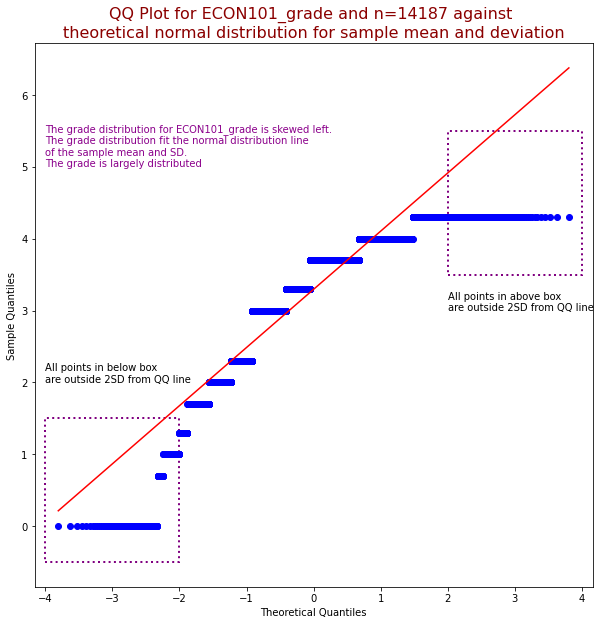

In [ ]:
import statsmodels.api as sm
import matplotlib.patches as patches
df=pd.read_csv('assets/class_grades.csv')
#drop irrelevant colums
df=df.iloc[:,1:7]
df.columns
courses=['ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade','MATH217_grade', 'STATS250_grade', 'EECS545_grade']
#drop NaN and standardise text of letter grades for each course
subjects=[]
for course in courses:
    subdna=df[course].dropna().apply(lambda x:str(x).strip())
    subjects.append(subdna)
#map letter grade to numerical scale to faciliate histogram plot
#dictgrade={'A+':12.0,'A':11.0,'A-':10.0,'B+':9.0,'B':8.0,'B-':7.0,'C+':6.0,'C':5.0,'C-':4.0,'D+':3.0,'D':2.0,'D-':1.0,'E':0.0}
dictgrade={'A+':4.3,'A':4.0,'A-':3.7,'B+':3.3,'B':3.0,'B-':3.7,'C+':2.3,'C':2.0,'C-':1.7,'D+':1.3,'D':1.0,'D-':0.7,'E':0.0}
subjects_clean=[]
for sub in subjects:
    subject=sub.map(dictgrade)
    subjects_clean.append(subject)

fig, axs = plt.subplots(1,1,figsize=(10, 10))
ax1=plt.subplot(111)
#ECON101
z=subjects_clean[0]
z1=sorted(z)
fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax1)
rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec1)
text1='All points in below box \nare outside 2SD from QQ line'
ax1.text(-4,2,text1,fontsize=10)
rec2=patches.Rectangle((2,3.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec2)
text2='All points in above box \nare outside 2SD from QQ line'
ax1.text(2,3,text2,fontsize=10)
text3='The grade distribution for {} is skewed left.\nThe grade distribution fit the normal distribution line \nof the sample mean and SD.\nThe grade is largely distributed'.format(courses[0])
ax1.text(-4,5,text3,fontsize=10,color='darkmagenta')
text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[0],len(z1))
ax1.set_title(text4,fontsize=16,color='darkred')
plt.show()


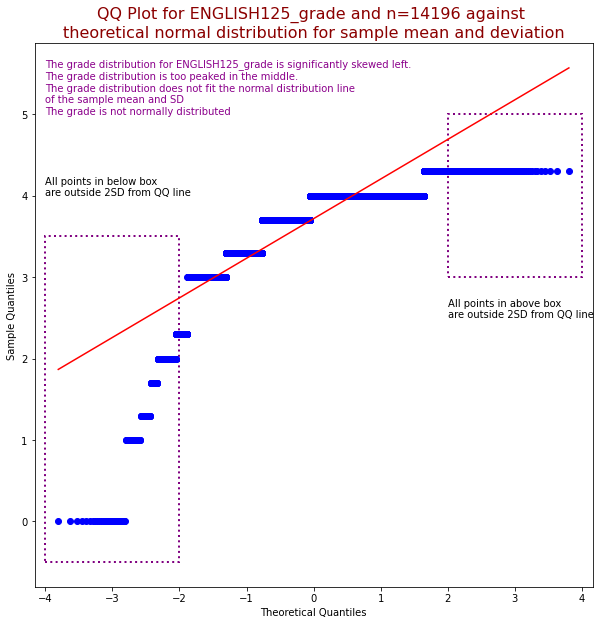

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10, 10))
ax1=plt.subplot(111)
#ENGLISH125
z=subjects_clean[1]
z1=sorted(z)
fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax1)
rec1=patches.Rectangle((-4,-0.5),2,4,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec1)
text1='All points in below box \nare outside 2SD from QQ line'
ax1.text(-4,4,text1,fontsize=10)
rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec2)
text2='All points in above box \nare outside 2SD from QQ line'
ax1.text(2,2.5,text2,fontsize=10)
text3='The grade distribution for {} is significantly skewed left.\nThe grade distribution is too peaked in the middle.\nThe grade distribution does not fit the normal distribution line \nof the sample mean and SD\nThe grade is not normally distributed'.format(courses[1])
ax1.text(-4,5,text3,fontsize=10,color='darkmagenta')
text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[1],len(z1))
ax1.set_title(text4,fontsize=16,color='darkred')
plt.show()


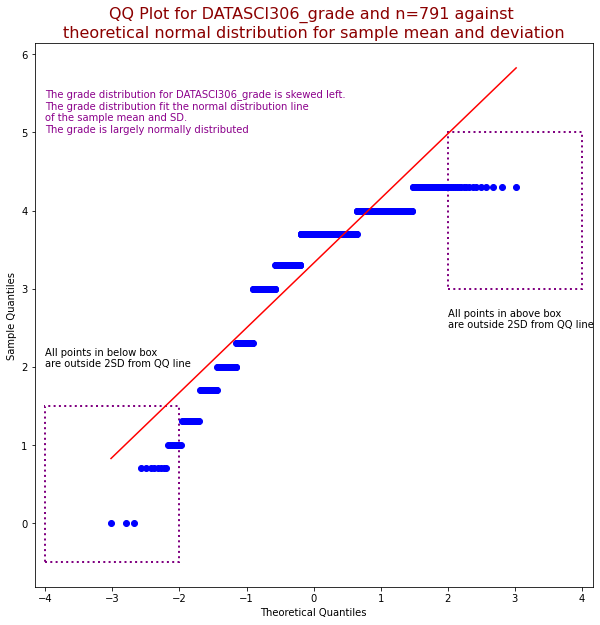

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10, 10))
ax1=plt.subplot(111)
#DATASCI
z=subjects_clean[2]
z1=sorted(z)
fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax1)
rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec1)
text1='All points in below box \nare outside 2SD from QQ line'
ax1.text(-4,2,text1,fontsize=10)
rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec2)
text2='All points in above box \nare outside 2SD from QQ line'
ax1.text(2,2.5,text2,fontsize=10)
text3='The grade distribution for {} is skewed left.\nThe grade distribution fit the normal distribution line \nof the sample mean and SD.\nThe grade is largely normally distributed'.format(courses[2])
ax1.text(-4,5,text3,fontsize=10,color='darkmagenta')
text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[2],len(z1))
ax1.set_title(text4,fontsize=16,color='darkred')
plt.show()


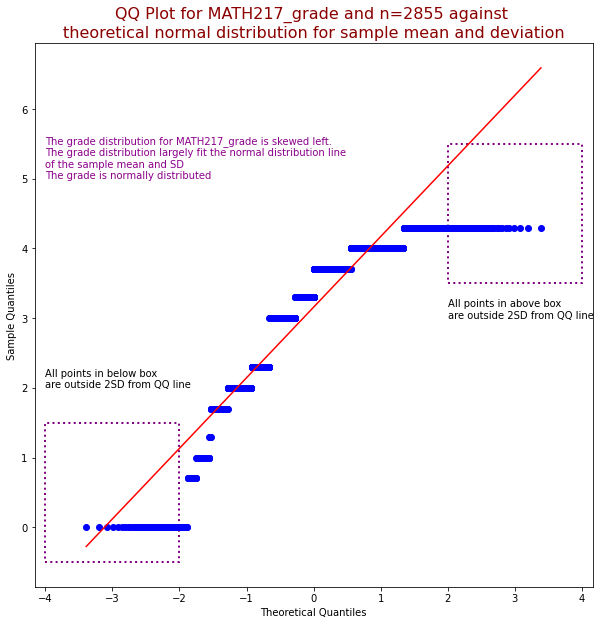

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10, 10))
ax1=plt.subplot(111)
#MATH217
z=subjects_clean[3]
z1=sorted(z)
fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax1)
rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec1)
text1='All points in below box \nare outside 2SD from QQ line'
ax1.text(-4,2,text1,fontsize=10)
rec2=patches.Rectangle((2,3.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec2)
text2='All points in above box \nare outside 2SD from QQ line'
ax1.text(2,3,text2,fontsize=10)
text3='The grade distribution for {} is skewed left.\nThe grade distribution largely fit the normal distribution line \nof the sample mean and SD\nThe grade is normally distributed'.format(courses[3])
ax1.text(-4,5,text3,fontsize=10,color='darkmagenta')
text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[3],len(z1))
ax1.set_title(text4,fontsize=16,color='darkred')
plt.show()

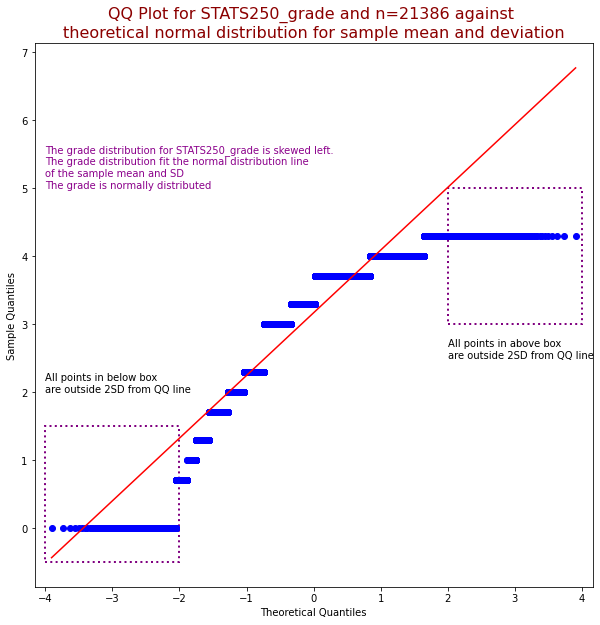

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10, 10))
ax1=plt.subplot(111)
#STATS250
z=subjects_clean[4]
z1=sorted(z)
fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax1)
rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec1)
text1='All points in below box \nare outside 2SD from QQ line'
ax1.text(-4,2,text1,fontsize=10)
rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec2)
text2='All points in above box \nare outside 2SD from QQ line'
ax1.text(2,2.5,text2,fontsize=10)
text3='The grade distribution for {} is skewed left.\nThe grade distribution fit the normal distribution line \nof the sample mean and SD\nThe grade is normally distributed'.format(courses[4])
ax1.text(-4,5,text3,fontsize=10,color='darkmagenta')
text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[4],len(z1))
ax1.set_title(text4,fontsize=16,color='darkred')
plt.show()

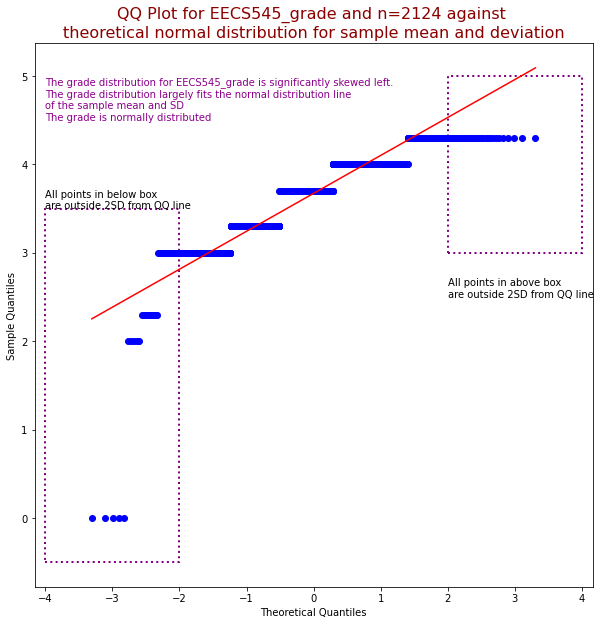

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10, 10))
ax1=plt.subplot(111)
#EECS545
z=subjects_clean[5]
z1=sorted(z)
fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax1)
rec1=patches.Rectangle((-4,-0.5),2,4,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec1)
text1='All points in below box \nare outside 2SD from QQ line'
ax1.text(-4,3.5,text1,fontsize=10)
rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
ax1.add_patch(rec2)
text2='All points in above box \nare outside 2SD from QQ line'
ax1.text(2,2.5,text2,fontsize=10)
text3='The grade distribution for {} is significantly skewed left.\nThe grade distribution largely fits the normal distribution line \nof the sample mean and SD\nThe grade is normally distributed'.format(courses[5])
ax1.text(-4,4.5,text3,fontsize=10,color='darkmagenta')
text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[5],len(z1))
ax1.set_title(text4,fontsize=16,color='darkred')
plt.show()

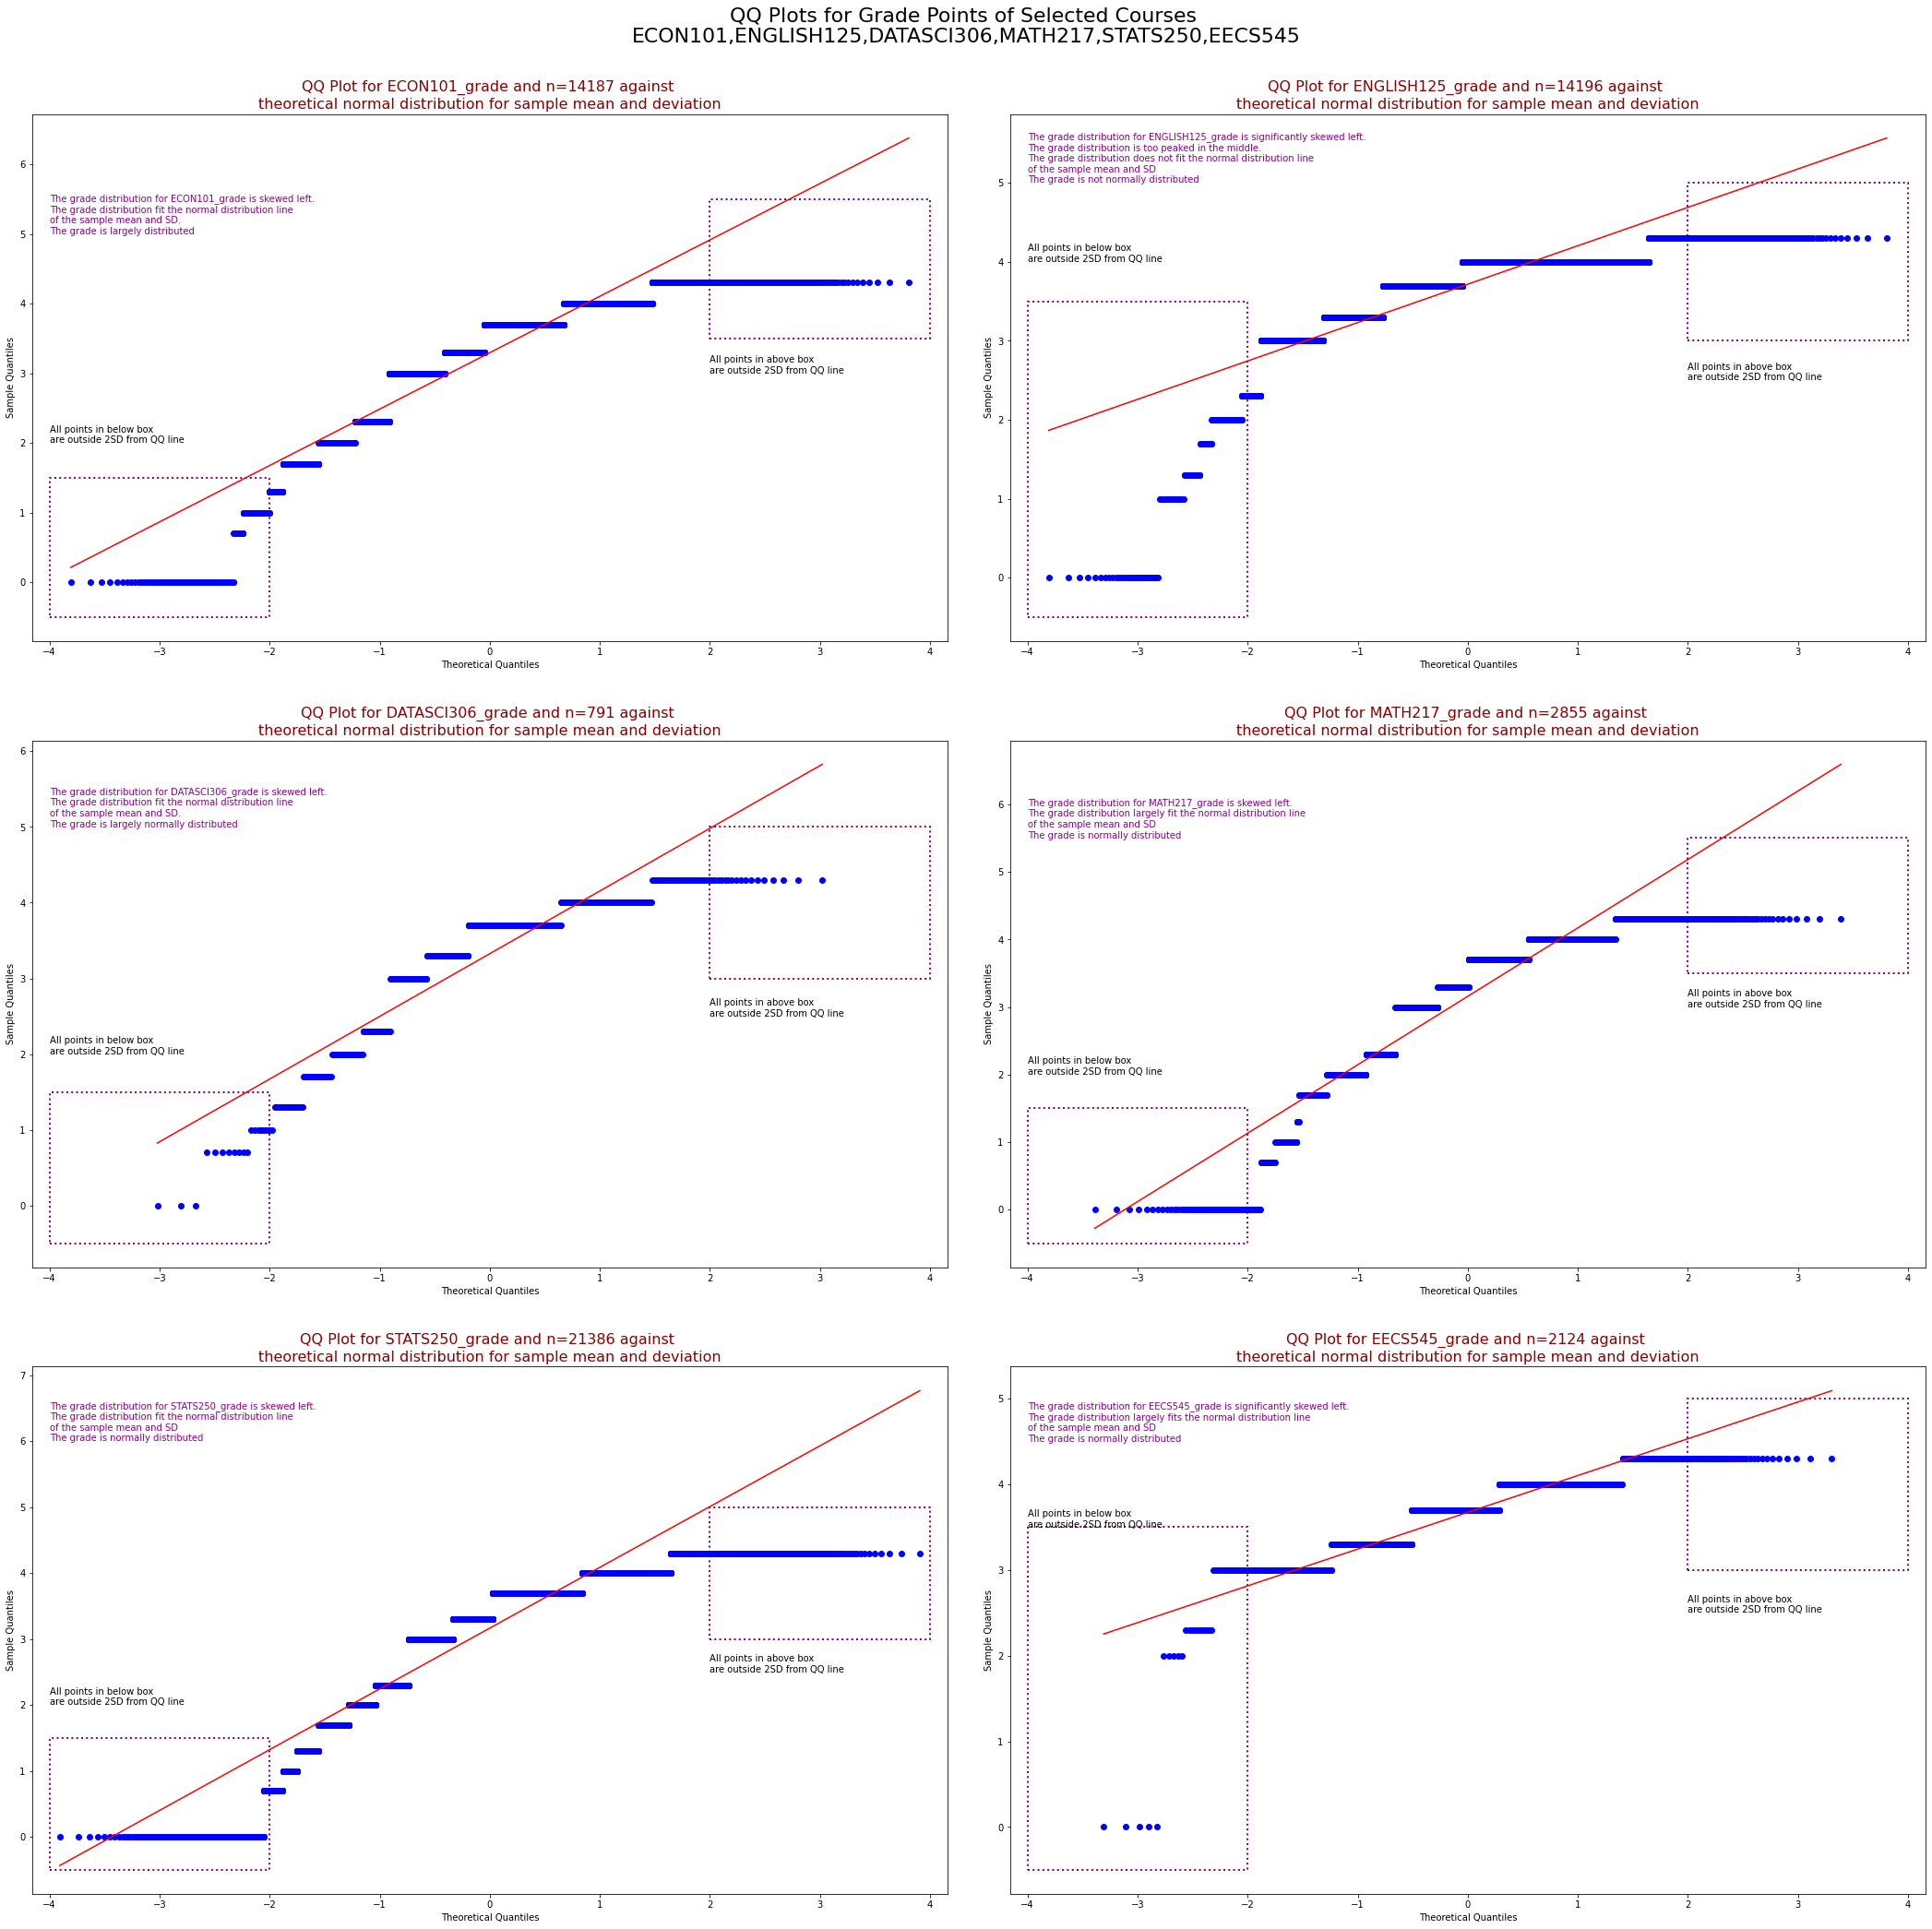

In [ ]:
def grade_normality():
    df=pd.read_csv('assets/class_grades.csv')
    #drop irrelevant colums
    df=df.iloc[:,1:7]
    df.columns
    courses=['ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade','MATH217_grade', 'STATS250_grade', 'EECS545_grade']
    #drop NaN and standardise text of letter grades for each course
    subjects=[]
    for course in courses:
        subdna=df[course].dropna().apply(lambda x:str(x).strip())
        subjects.append(subdna)
    dictgrade={'A+':4.3,'A':4.0,'A-':3.7,'B+':3.3,'B':3.0,'B-':3.7,'C+':2.3,'C':2.0,'C-':1.7,'D+':1.3,'D':1.0,'D-':0.7,'E':0.0}
    subjects_clean=[]
    for sub in subjects:
        subject=sub.map(dictgrade)
        subjects_clean.append(subject)

    courses=['ECON101_grade', 'ENGLISH125_grade', 'DATASCI306_grade','MATH217_grade', 'STATS250_grade', 'EECS545_grade']

    fig, axs = plt.subplots(3,2,figsize=(30, 30))
    ax1=plt.subplot(321)
    ax2=plt.subplot(322)
    ax3=plt.subplot(323)
    ax4=plt.subplot(324)
    ax5=plt.subplot(325)
    ax6=plt.subplot(326)

    #ECON101
    z=subjects_clean[0]
    z1=sorted(z)
    fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax1)
    rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax1.add_patch(rec1)
    text1='All points in below box \nare outside 2SD from QQ line'
    ax1.text(-4,2,text1,fontsize=10)
    rec2=patches.Rectangle((2,3.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax1.add_patch(rec2)
    text2='All points in above box \nare outside 2SD from QQ line'
    ax1.text(2,3,text2,fontsize=10)
    text3='The grade distribution for {} is skewed left.\nThe grade distribution fit the normal distribution line \nof the sample mean and SD.\nThe grade is largely distributed'.format(courses[0])
    ax1.text(-4,5,text3,fontsize=10,color='darkmagenta')
    text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[0],len(z1))
    ax1.set_title(text4,fontsize=16,color='darkred')
    
    #ENGLISH125
    z=subjects_clean[1]
    z1=sorted(z)
    fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax2)
    rec1=patches.Rectangle((-4,-0.5),2,4,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax2.add_patch(rec1)
    text1='All points in below box \nare outside 2SD from QQ line'
    ax2.text(-4,4,text1,fontsize=10)
    rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax2.add_patch(rec2)
    text2='All points in above box \nare outside 2SD from QQ line'
    ax2.text(2,2.5,text2,fontsize=10)
    text3='The grade distribution for {} is significantly skewed left.\nThe grade distribution is too peaked in the middle.\nThe grade distribution does not fit the normal distribution line \nof the sample mean and SD\nThe grade is not normally distributed'.format(courses[1])
    ax2.text(-4,5,text3,fontsize=10,color='darkmagenta')
    text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[1],len(z1))
    ax2.set_title(text4,fontsize=16,color='darkred')
    
    #DATASCI306
    z=subjects_clean[2]
    z1=sorted(z)
    fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax3)
    rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax3.add_patch(rec1)
    text1='All points in below box \nare outside 2SD from QQ line'
    ax3.text(-4,2,text1,fontsize=10)
    rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax3.add_patch(rec2)
    text2='All points in above box \nare outside 2SD from QQ line'
    ax3.text(2,2.5,text2,fontsize=10)
    text3='The grade distribution for {} is skewed left.\nThe grade distribution fit the normal distribution line \nof the sample mean and SD.\nThe grade is largely normally distributed'.format(courses[2])
    ax3.text(-4,5,text3,fontsize=10,color='darkmagenta')
    text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[2],len(z1))
    ax3.set_title(text4,fontsize=16,color='darkred')

    #MATH217
    z=subjects_clean[3]
    z1=sorted(z)
    fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax4)
    rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax4.add_patch(rec1)
    text1='All points in below box \nare outside 2SD from QQ line'
    ax4.text(-4,2,text1,fontsize=10)
    rec2=patches.Rectangle((2,3.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax4.add_patch(rec2)
    text2='All points in above box \nare outside 2SD from QQ line'
    ax4.text(2,3,text2,fontsize=10)
    text3='The grade distribution for {} is skewed left.\nThe grade distribution largely fit the normal distribution line \nof the sample mean and SD\nThe grade is normally distributed'.format(courses[3])
    ax4.text(-4,5.5,text3,fontsize=10,color='darkmagenta')
    text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[3],len(z1))
    ax4.set_title(text4,fontsize=16,color='darkred')

    #STATS250
    z=subjects_clean[4]
    z1=sorted(z)
    fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax5)
    rec1=patches.Rectangle((-4,-0.5),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax5.add_patch(rec1)
    text1='All points in below box \nare outside 2SD from QQ line'
    ax5.text(-4,2,text1,fontsize=10)
    rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax5.add_patch(rec2)
    text2='All points in above box \nare outside 2SD from QQ line'
    ax5.text(2,2.5,text2,fontsize=10)
    text3='The grade distribution for {} is skewed left.\nThe grade distribution fit the normal distribution line \nof the sample mean and SD\nThe grade is normally distributed'.format(courses[4])
    ax5.text(-4,6,text3,fontsize=10,color='darkmagenta')
    text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[4],len(z1))
    ax5.set_title(text4,fontsize=16,color='darkred')

    #EECS545
    z=subjects_clean[5]
    z1=sorted(z)
    fig=sm.qqplot(np.array(z1), stats.norm, fit=False, line='s',ax=ax6)
    rec1=patches.Rectangle((-4,-0.5),2,4,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax6.add_patch(rec1)
    text1='All points in below box \nare outside 2SD from QQ line'
    ax6.text(-4,3.5,text1,fontsize=10)
    rec2=patches.Rectangle((2,3),2,2,ls=':',lw='2',edgecolor='purple',facecolor='none')
    ax6.add_patch(rec2)
    text2='All points in above box \nare outside 2SD from QQ line'
    ax6.text(2,2.5,text2,fontsize=10)
    text3='The grade distribution for {} is significantly skewed left.\nThe grade distribution largely fits the normal distribution line \nof the sample mean and SD\nThe grade is normally distributed'.format(courses[5])
    ax6.text(-4,4.5,text3,fontsize=10,color='darkmagenta')
    text4='QQ Plot for {} and n={} against \ntheoretical normal distribution for sample mean and deviation'.format(courses[5],len(z1))
    ax6.set_title(text4,fontsize=16,color='darkred')

    text='QQ Plots for Grade Points of Selected Courses \nECON101,ENGLISH125,DATASCI306,MATH217,STATS250,EECS545'
    plt.suptitle(text,fontsize=22)
    plt.tight_layout(pad=4)
    plt.show()

grade_normality()